In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [4]:
#Importing Datasets
df1 = pd.read_csv("Titanic_train.csv")
df2 = pd.read_csv("Titanic_test.csv")

In [5]:
#Data Preprocessing
print("\nData Shape : ")
print(df1.shape)
print("\nData Info : ")
print(df1.info())
print("\nData Description : ")
print(df1.describe())
print("\nInitial Values of Data : ")
print(df1.head())

df1.drop(["Cabin","Ticket","Name"],axis=1,inplace=True)
df2.drop(["Cabin","Ticket","Name"],axis=1,inplace=True)
df1["Age"].fillna(df1["Age"].median())
df2["Age"].fillna(df2["Age"].median())


Data Shape : 
(891, 12)

Data Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Data Description : 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

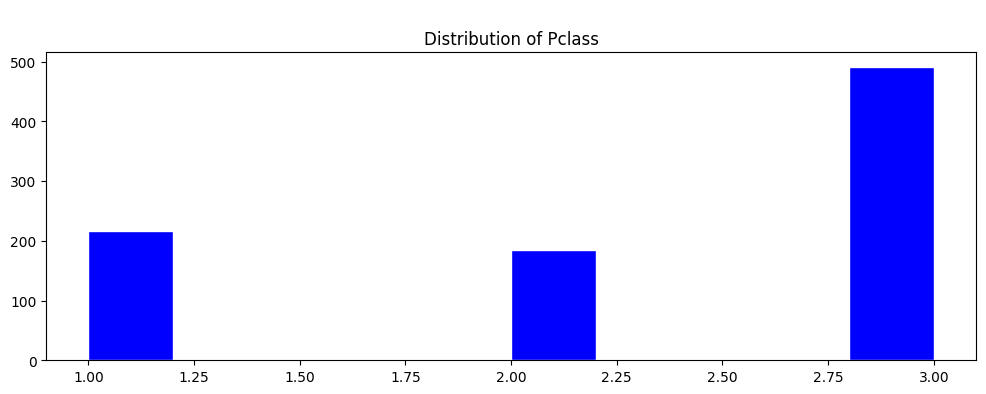

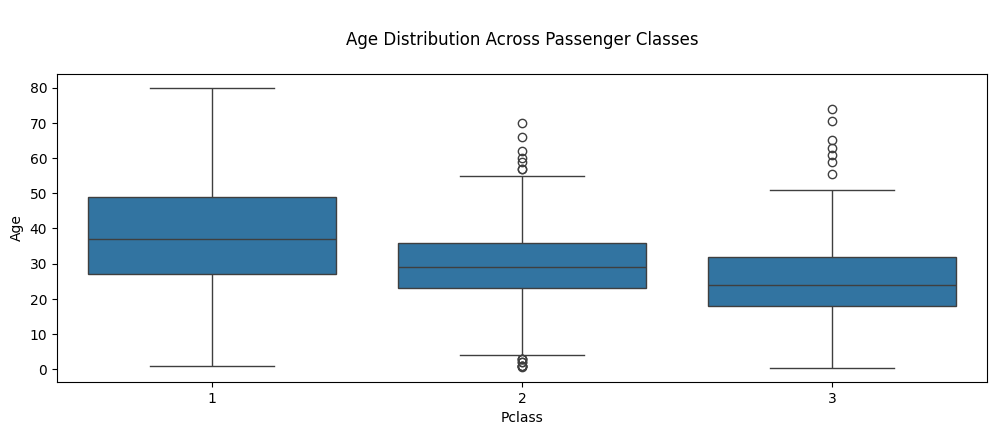

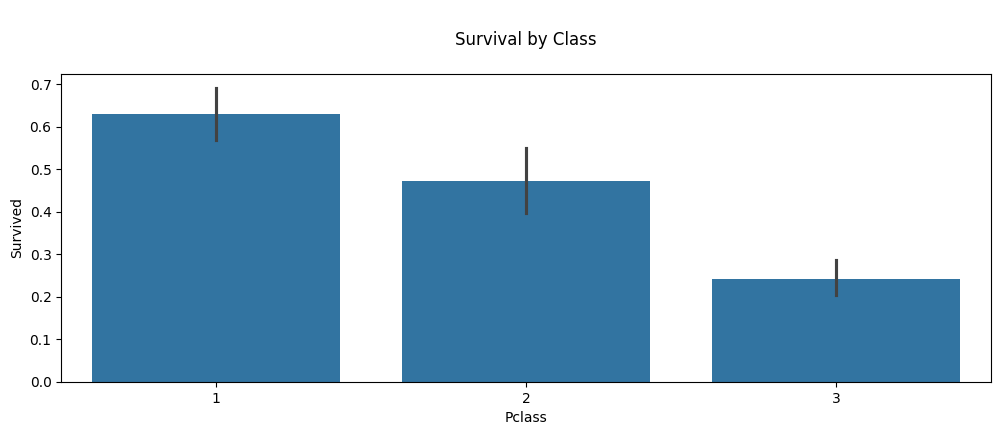

In [6]:
#Data Visualizations
plt.figure(figsize=(12,4))
plt.hist(df1["Pclass"],color="Blue",edgecolor="White")
plt.title("\nDistribution of Pclass")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x="Pclass",y="Age",data=df1)
plt.title("\nAge Distribution Across Passenger Classes\n")
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x="Pclass",y="Survived",data=df1)
plt.title("\nSurvival by Class\n")
plt.show()

In [7]:
#Encoding and Scaling
cat_features1 = df1.select_dtypes(include=["object"]).columns
cat_features2 = df2.select_dtypes(include=["object"]).columns
num_features1 = df1.select_dtypes(include=["int64","float64"]).columns
num_features2 = df2.select_dtypes(include=["int64","float64"]).columns

df1 = pd.get_dummies(df1,columns=cat_features1,drop_first=True)
df2 = pd.get_dummies(df2,columns=cat_features2,drop_first=True)

scaler1 = StandardScaler()
df1[num_features1] = scaler1.fit_transform(df1[num_features1])
scaler2 = StandardScaler()
df2[num_features2] = scaler2.fit_transform(df2[num_features2])

In [8]:
#Train-Test Split
X = df1.drop("Survived",axis=1)
y = df1["Survived"].astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
#Creating Classification Models
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train,y_train)

y_pred_lgb = lgb_model.predict(X_test)

xgb_model = xgb.XGBClassifier(use_label_encoder=False,eval_metric="logloss",random_state=42)
xgb_model.fit(X_train,y_train);

y_pred_xgb = xgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Aarush\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:13:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
#Evaluation Metrics
print("\n-------LightGB Model--------\n")
print("L Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("L Precision:", precision_score(y_test, y_pred_lgb))
print("L Recall:", recall_score(y_test, y_pred_lgb))
print("L F1-score:", f1_score(y_test, y_pred_lgb))
print("L Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nL Classification Report:\n", classification_report(y_test, y_pred_lgb))

print("\n-------XGBoost Model--------\n")
print("X Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("X Precision:", precision_score(y_test, y_pred_xgb))
print("X Recall:", recall_score(y_test, y_pred_xgb))
print("X F1-score:", f1_score(y_test, y_pred_xgb))
print("X Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nX Classification Report:\n", classification_report(y_test, y_pred_xgb))

test_predictions_lgb = lgb_model.predict(df2)
test_predictions_xgb = xgb_model.predict(df2)

submission = pd.DataFrame({
    "PassengerId": df2["PassengerId"],
    "Survived_LGB": test_predictions_lgb,
    "Survived_XGB": test_predictions_xgb
})

submission.to_csv("titanic_predictions.csv",index=False)


-------LightGB Model--------

L Accuracy: 0.8100558659217877
L Precision: 0.7941176470588235
L Recall: 0.7297297297297297
L F1-score: 0.7605633802816901
L Confusion Matrix:
 [[91 14]
 [20 54]]

L Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


-------XGBoost Model--------

X Accuracy: 0.7932960893854749
X Precision: 0.7605633802816901
X Recall: 0.7297297297297297
X F1-score: 0.7448275862068966
X Confusion Matrix:
 [[88 17]
 [20 54]]

X Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg 

In [45]:
submission.head()

,PassengerId,Survived_LGB,Survived_XGB
0,-1.727912,0,0
1,-1.719625,0,0
2,-1.711337,0,0
3,-1.703050,0,0
4,-1.694763,1,1
